<h1>Simulación de un Proceso de Poisson en Python</h1>

Las cadenas de Markov son un concepto fundamental en el estudio de los procesos estocásticos, que son procesos aleatorios que evolucionan con el tiempo. Este modelo se utiliza para describir una secuencia de posibles eventos en la que la probabilidad de cada evento depende únicamente del estado alcanzado en el evento anterior. En otras palabras, las cadenas de Markov son un tipo de sistema dinámico en el que el futuro es independiente del pasado, dado el presente.

Imagina que estás jugando un juego de mesa donde cada turno consiste en moverse a una nueva posición según ciertas reglas. En una cadena de Markov, estas reglas están definidas por las probabilidades de transición entre diferentes posiciones. Por ejemplo, si estás en la posición A, puede haber una probabilidad del 50% de moverte a la posición B y un 50% de quedarte en la posición A.

Estas probabilidades de transición son las que determinan cómo se comporta el sistema a lo largo del tiempo. Una característica importante de las cadenas de Markov es que estas probabilidades no cambian con el tiempo; es decir, la probabilidad de moverse de un estado a otro es siempre la misma sin importar en qué momento te encuentres en el proceso.

Las cadenas de Markov tienen aplicaciones en diversos campos, desde la biología y la química, donde se utilizan para modelar procesos moleculares, hasta la economía y las finanzas, donde ayudan a predecir el comportamiento de los mercados. También se utilizan en informática y telecomunicaciones para optimizar algoritmos y redes.

<h2>Simulando en Python</h2>

Vamos a simular una cadena de Markov para entender mejor cómo funcionan estos procesos y observar su comportamiento a lo largo del tiempo. La simulación que realizaremos se centrará en una caminata de la cadena de Markov, donde veremos cómo se mueve el sistema a través de diferentes estados.

In [56]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import math
import pandas as pd

La función randwalk simula el cambio de un estado a otro, subiendo o bajando por los estados. Si el cambio de estado es -1, la función mueve el estado hacia abajo. Si el cambio de estado es +1, la función mueve el estado hacia arriba.

In [57]:
def randwalk(n, s, p):
    start = 0
    walk=[]
    for i in range(n):
        step =np.random.choice(s,p=p)
        start = start+step
        walk.append(start)
    
    return walk

En el primer ejemplo, configuramos una probabilidad del 50% para dos escenarios distintos. Esto significa que, en cada paso de la simulación, había una probabilidad igual de 0.5 tanto para subir como para bajar en los estados. Para visualizar y analizar cómo evolucionó el sistema a lo largo de los primeros 10,000 pasos, generamos un gráfico que muestra el recorrido completo de la cadena de Markov. Este gráfico nos permite examinar las transiciones entre estados y entender mejor cómo se distribuyeron las visitas a lo largo del tiempo.

Text(0.5, 0, 'Pasos')

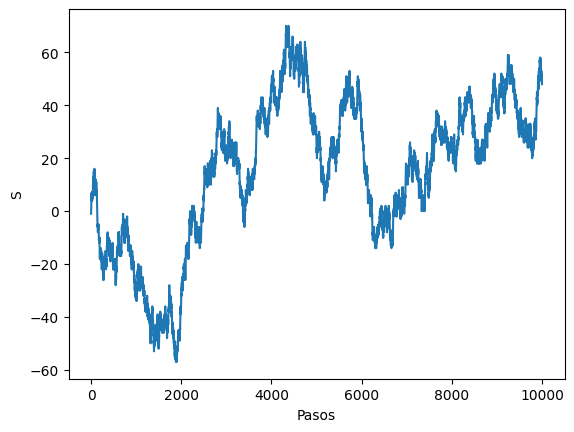

In [58]:
s = [-1,1]
p = [0.5,0.5]
n = 10000

walk = randwalk(n, s, p)

sns.lineplot(walk)
plt.ylabel('S')
plt.xlabel('Pasos')

Después, realizamos una modificación en las probabilidades de la cadena de Markov. En esta ocasión, configuramos la probabilidad de moverse hacia abajo, representada por el estado -1, en un 40%. Mientras tanto, aumentamos la probabilidad de moverse hacia arriba, indicada por el estado +1, a un 60%. Esta ajuste en las probabilidades afecta directamente cómo el sistema realiza sus transiciones entre estados durante la simulación.

Text(0.5, 0, 'Pasos')

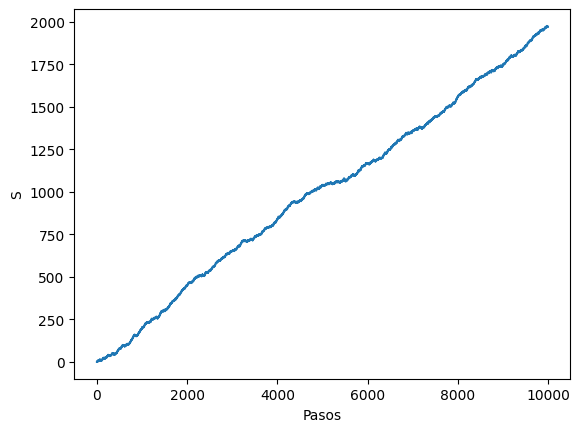

In [59]:
p1 = [0.4,0.6]
walk1 = randwalk(n, s, p1)

sns.lineplot(walk1)
plt.ylabel('S')
plt.xlabel('Pasos')

También es de interés explorar y analizar el comportamiento del sistema en la dirección inversa. Esto implica observar cómo evolucionan las transiciones cuando se modifican las probabilidades o se cambian las condiciones iniciales. Comprender el comportamiento en ambas direcciones proporciona una visión más completa de la dinámica del sistema y puede revelar patrones interesantes o asimetrías en su comportamiento.

Text(0.5, 0, 'Pasos')

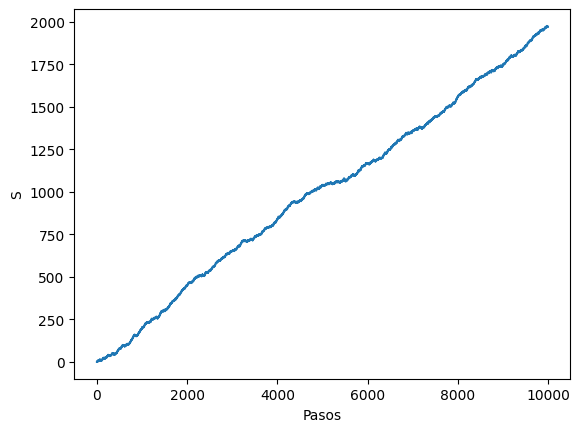

In [60]:
p2 = [0.6,0.4]
walk2 = randwalk(n, s, p2)

sns.lineplot(walk1)
plt.ylabel('S')
plt.xlabel('Pasos')

Unificamos las gráficas de los diferentes escenarios para visualizar cómo un ligero cambio en la probabilidad de transición puede resultar en modificaciones drásticas en la trayectoria completa de la caminata. Este análisis nos permite entender cómo pequeñas variaciones en las condiciones iniciales o en los parámetros del modelo pueden influir considerablemente en el comportamiento global del sistema a lo largo del tiempo. Observar estas variaciones nos ayuda a captar la sensibilidad del modelo y a identificar puntos críticos donde ajustes sutiles pueden tener repercusiones significativas en los resultados esperados.

Text(0.5, 0, 'Pasos')

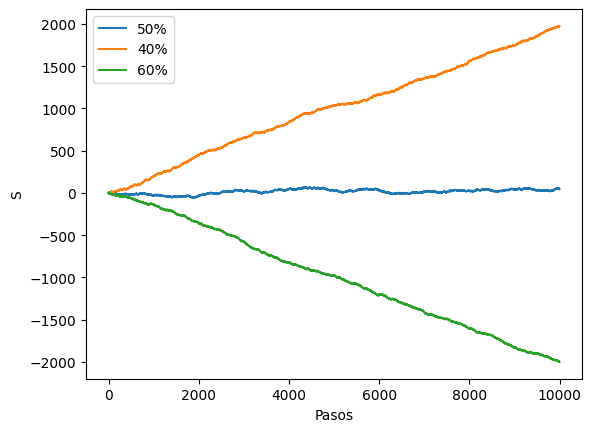

In [61]:
sns.lineplot(walk, label = '50%')
sns.lineplot(walk1, label = '40%')
sns.lineplot(walk2, label = '60%')
plt.ylabel('S')
plt.xlabel('Pasos')

<h2>¿Qué sucede cuando deseamos simular una cadena de Markov más compleja?</h2>

Para abordar la simulación de una cadena de Markov más compleja, necesitamos representar tanto los nodos del sistema como la matriz de transición de manera separada en matrices distintas. Esta separación nos permite estructurar y gestionar eficazmente el modelo.

Primero, los nodos del sistema se representan generalmente como los diferentes estados o posiciones que puede ocupar el sistema en cada paso del tiempo. Cada nodo tiene asociada una matriz que describe las probabilidades de transición entre esos estados. Por ejemplo, en un modelo más complejo, podríamos tener nodos que representan estados muy diversos, como condiciones climáticas, estados financieros, o estados de salud en un sistema biológico.

Luego, la matriz de transición es una herramienta crucial que especifica las probabilidades de moverse de un estado a otro en cada paso del tiempo. Esta matriz guía la simulación, determinando las transiciones posibles en función del estado actual del sistema y las probabilidades asociadas.

Al utilizar matrices separadas para los nodos y la matriz de transición, podemos realizar simulaciones detalladas y sistemáticas. Esto facilita el análisis del comportamiento del sistema a largo plazo, la predicción de futuros estados y la evaluación de diferentes estrategias o escenarios.

In [62]:
nodes = [0,1,2,]
trans_matrix = np.array([[0.5,0.5,0],[0,0.5,0.5],[0.5,0,0.5]])
markov = pd.DataFrame(trans_matrix,columns=nodes,index=nodes)
display(markov)

,0,1,2
0,0.5,0.5,0.0
1,0.0,0.5,0.5
2,0.5,0.0,0.5


La función state_change calcula el próximo estado basándose en el estado actual del sistema.

In [63]:
def state_change(start_state,nodes,trans_matrix):
    index_list = np.arange(0,len(nodes),1).astype(int)
    index_state = nodes.index(start_state)
    row = trans_matrix[index_state]
    end_index = np.random.choice(index_list,p=row)
    end_state = nodes[end_index]
    return end_state

La función markov_walk realiza un recorrido con un parámetro n que indica la cantidad de pasos a seguir en la cadena de Markov.

In [64]:
def markov_walk(n,nodes, trans_matrix, start):
    states = [start]
    start_state = start
    for i in range(n):
        start_state = state_change(start_state,nodes,trans_matrix)
        states.append(start_state)

    return states


En nuestra primera simulación, llevamos a cabo una caminata de 10,000 pasos iniciando en el primer nodo del sistema. Después de completar el recorrido, generamos un histograma que ilustra la frecuencia con la que se visitaron cada uno de los estados durante la caminata. Observamos que la distribución entre los estados fue uniforme, lo que indica que el sistema transitó de manera equitativa entre todas las posibles condiciones o estados representados en la cadena de Markov. Este análisis nos proporciona una visión inicial de cómo se comporta el sistema bajo las condiciones y parámetros especificados en nuestra simulación inicial.

<Axes: ylabel='Count'>

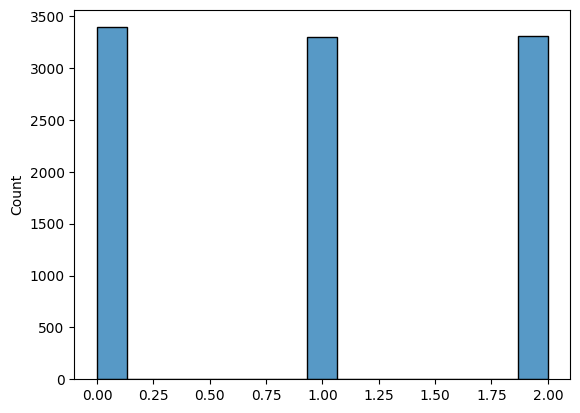

In [65]:

walk1 = markov_walk(n,nodes, trans_matrix, nodes[0])
sns.histplot(x=walk1)

Modificamos la matriz de transición y procedimos a repetir el recorrido para observar cómo cambia la distribución entre los estados.

<Axes: ylabel='Count'>

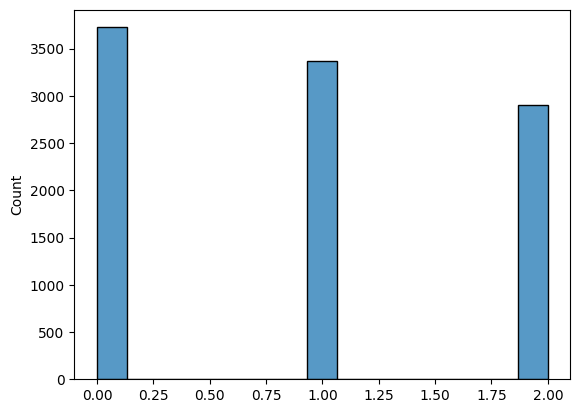

In [66]:
trans_matrix1 = np.array([[0.5,0.25,0.25],[0.3,0.1,0.6],[0.3,0.7,0]])
walk2 = markov_walk(n,nodes, trans_matrix1, nodes[0])
sns.histplot(x=walk2)

Podemos visualizar el recorrido completo de la última caminata.

In [67]:
walk2

[0,
 2,
 0,
 1,
 1,
 2,
 1,
 0,
 0,
 2,
 1,
 2,
 1,
 0,
 2,
 1,
 2,
 1,
 2,
 1,
 0,
 2,
 1,
 2,
 1,
 2,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 0,
 2,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 2,
 1,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 2,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 1,
 2,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 2,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 0,
 2,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 2,
 1,
 0,
 0,


<h2>Conclusión</h2>

La simulación de la cadena de Markov nos ha proporcionado una comprensión profunda del comportamiento dinámico del sistema bajo diferentes configuraciones de la matriz de transición. A través de la visualización de los recorridos y la análisis de las distribuciones de estado resultantes, hemos observado cómo pequeños ajustes en las probabilidades de transición pueden tener un impacto significativo en la trayectoria global de la caminata. Esta experiencia nos ha demostrado la utilidad de las cadenas de Markov como herramienta poderosa para modelar y estudiar sistemas complejos, permitiéndonos prever y comprender mejor las dinámicas estocásticas subyacentes en una amplia gama de aplicaciones prácticas.